## Lecture 9 Simulations and Examples of Correlation 

In [1]:
#load needed modules 
import numpy as np
from numpy import linalg
from hdf5storage import loadmat
from matplotlib import pyplot as plt

In [2]:
def sinusoid(f,t,A = 1,theta = 0):
    ''' makes a sinusoid of given frequency (f) at the time points given in t. 
    Amplitude (A) and phase (theta) can be optionally specified.  Phase is given in degrees not radians'''
    theta = theta*np.pi/180 #convert theta from degrees to radians
    e = A*np.cos(2*np.pi*f*t+theta)
    return e

### Simulation 1 Relationship between angle and correlation coefficient.  

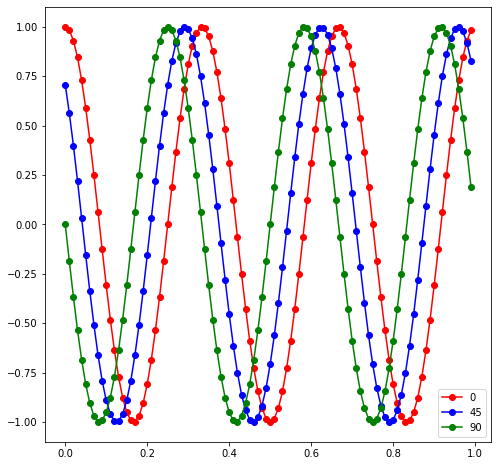

In [3]:
sr = 100
deltaT = 1/sr 
T = 1
time = np.arange(0,T,deltaT)
f = 3 
e1 = sinusoid(f,time)
plt.figure(figsize = (8,8))
#theta = 0
e2 = sinusoid(f,time,theta = 0)
plt.plot(time,e1,'ro-')
#theta = 45 
e2 = sinusoid(f,time,theta = 45)
plt.plot(time,e2,'bo-')
#theta = 45 
e3 = sinusoid(f,time,theta = 90)
plt.plot(time,e3,'go-')
plt.legend(('0','45','90'))
plt.show()


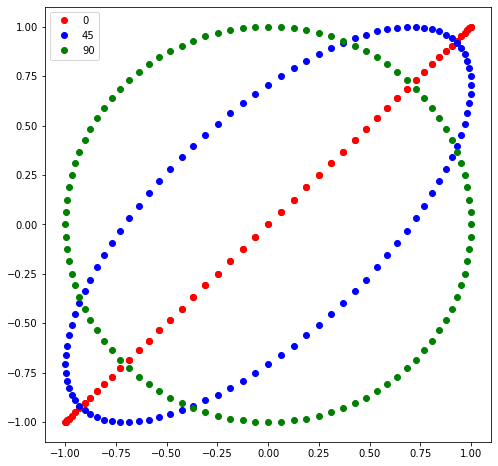

In [4]:
plt.figure(figsize = (8,8))
plt.plot(e1,e1,'ro')
plt.plot(e1,e2,'bo')
plt.plot(e1,e3,'go')
plt.legend(('0','45','90'))
plt.show()


#### We can compute the covariance and correlation coefficient between these sinusoids using the numpy functions
#### `cov` and `corrcoef` 
#### Note that I disabled builtin bias correction in this example.  

In [5]:
c11 = np.cov(e1,e1,bias = True)
c12 = np.cov(e1,e2,bias = True)
c13 = np.cov(e1,e3,bias = True)
r11 = np.corrcoef(e1,e1)
r12 = np.corrcoef(e1,e2)
r13 = np.corrcoef(e1,e3)

#### We can do this more elegantly 


In [6]:
emat = np.array([e1,e2,e3])
cmat = np.cov(emat,bias = True)
rmat = np.corrcoef(emat)
print('covariance matrix')
print(cmat)
print('correlation matrix')
print(rmat)

covariance matrix
[[5.00000000e-01 3.53553391e-01 7.60954106e-18]
 [3.53553391e-01 5.00000000e-01 3.53553391e-01]
 [7.60954106e-18 3.53553391e-01 5.00000000e-01]]
correlation matrix
[[1.00000000e+00 7.07106781e-01 1.52190821e-17]
 [7.07106781e-01 1.00000000e+00 7.07106781e-01]
 [1.52190821e-17 7.07106781e-01 1.00000000e+00]]


#### We can confirm that these correlation values correspond to the cosine of the angle.  

In [7]:
print(np.cos(45*np.pi/180))
print(np.cos(90*np.pi/180))

0.7071067811865476
6.123233995736766e-17


#### Example 1 EEG data 

In [10]:
eeg = loadmat('data/eeg.mat') #Load 2 channels of EEG
occ = eeg['Occ'][0]
occ = occ - np.mean(occ) #I need to center the data and remove the mean. 
fro = eeg['Fro'][0]
fro = fro -np.mean(fro) #I need to follow my own rule and remove the mean.
nsamp = len(fro)
time = np.arange(0,nsamp,1)
data = np.array([occ,fro]) #put them together in a matrix
Cdata = np.cov(data,bias = True) #compute covariance - note that this computation divides by n-1 as it is "unbiased" 
Cmult = (1/(nsamp))*(data@np.transpose(data)) #compute covariance by matrix multiplication
Rdata = np.corrcoef(data)

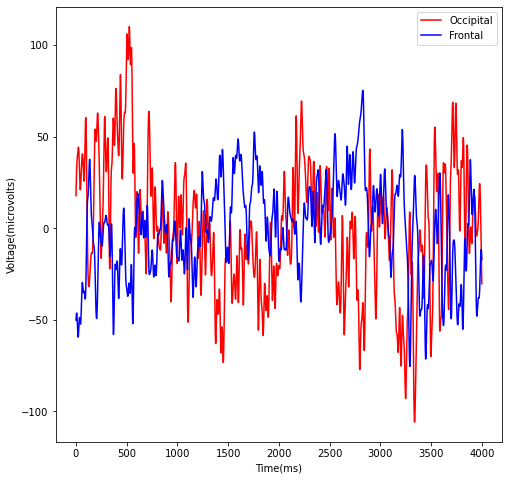

In [11]:
plt.figure(figsize = (8,8))
plt.plot(time,occ,'r')
plt.plot(time,fro,'b')
plt.legend(('Occipital','Frontal'))
plt.xlabel('Time(ms)')
plt.ylabel('Voltage(microvolts)')
plt.show()

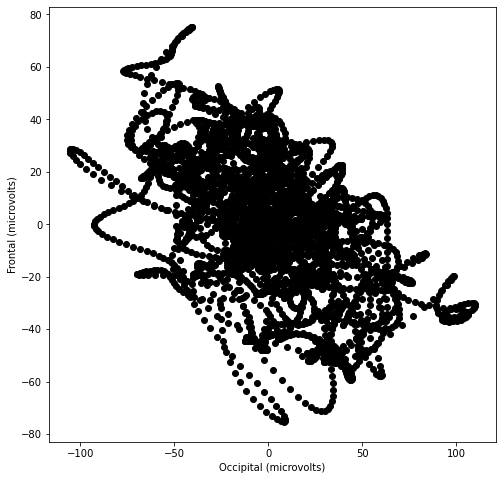

In [13]:
plt.figure(figsize =(8,8))
plt.plot(occ,fro,'ko')
plt.xlabel('Occipital (microvolts)')
plt.ylabel('Frontal (microvolts)')
plt.show()